In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns  
import statsmodels.formula.api as sm

In [2]:
play = pd.read_csv("google.csv")

In [3]:
#clean the data
play=play.dropna()
play=play[(play['Type']=='Free')|(play['Type']=='Paid')]
play=play[play['Rating']<5]
play=play[play['Rating']>0]
play['Installs']=play['Installs'].str.replace(r'\D','').astype(float)

In [4]:
play

,Category,Rating,Reviews,Installs,Type,Price
0,ART_AND_DESIGN,4.1,159,10000.0,Free,0.00
1,ART_AND_DESIGN,3.9,967,500000.0,Free,0.00
2,ART_AND_DESIGN,4.7,87510,5000000.0,Free,0.00
3,ART_AND_DESIGN,4.5,215644,50000000.0,Free,0.00
4,ART_AND_DESIGN,4.3,967,100000.0,Free,0.00
5,ART_AND_DESIGN,4.4,167,50000.0,Free,0.00
6,ART_AND_DESIGN,3.8,178,50000.0,Free,0.00
7,ART_AND_DESIGN,4.1,36815,1000000.0,Free,0.00
8,ART_AND_DESIGN,4.4,13791,1000000.0,Free,0.00
9,ART_AND_DESIGN,4.7,121,10000.0,Free,0.00


In [5]:
#get the descriptive summary of the data
play.describe()

,Rating,Reviews,Installs,Price
count,9092.000000,9.092000e+03,9.092000e+03,9092.000000
mean,4.167400,5.295412e+05,1.843680e+07,0.978665
std,0.503159,3.189785e+06,9.254924e+07,16.047995
min,1.000000,1.000000e+00,5.000000e+00,0.000000
25%,4.000000,2.507500e+02,1.000000e+04,0.000000
50%,4.300000,7.013500e+03,5.000000e+05,0.000000
75%,4.500000,8.772575e+04,5.000000e+06,0.000000
max,4.900000,7.815831e+07,1.000000e+09,400.000000


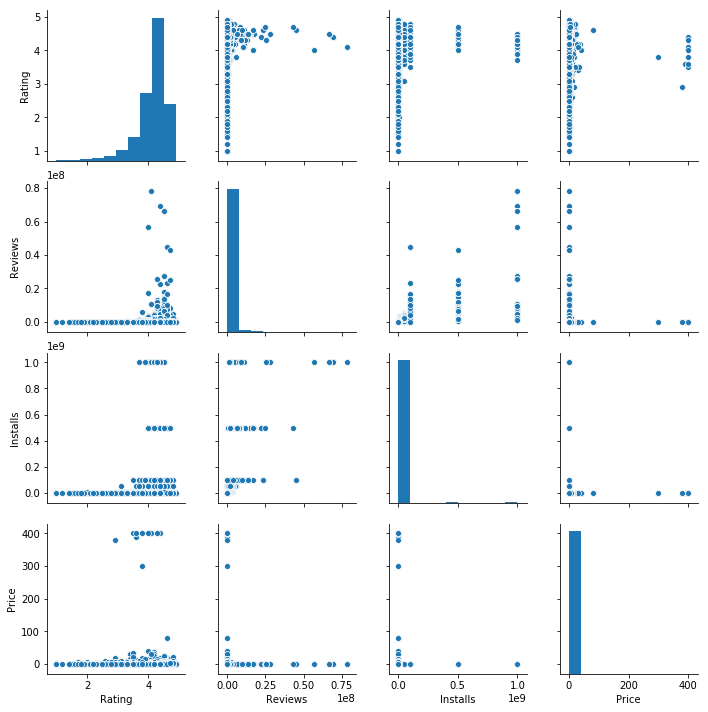

In [6]:
#show the relationship betwwen two variables in play
ax=sns.pairplot(play)

In [7]:
#correlation in play
play.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.078884,0.063048,-0.020942
Reviews,0.078884,1.000000,0.641276,-0.010011
Installs,0.063048,0.641276,1.000000,-0.012121
Price,-0.020942,-0.010011,-0.012121,1.000000


C:\Users\Jessie Hwang\Anaconda3\ana\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


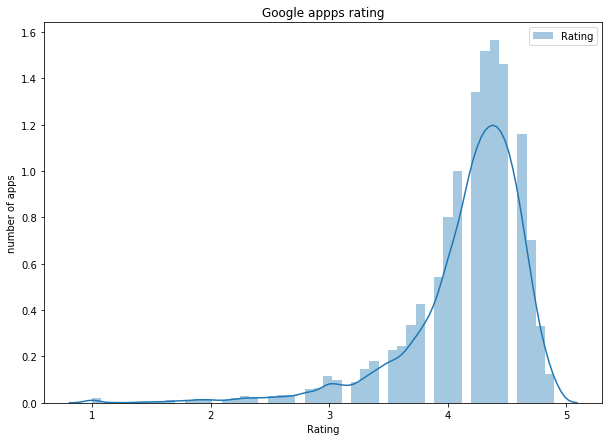

In [8]:
#Rating's distribution"
plt.figure(figsize=(10,7))
sns.distplot(play['Rating'])
plt.legend(['Rating'])
plt.title('Google appps rating')
plt.xlabel("Rating")
plt.ylabel("number of apps")
plt.show()

Text(0.5, 1.0, 'Rating based on installs')

<Figure size 720x720 with 0 Axes>

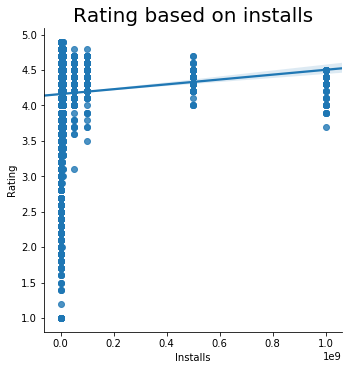

In [9]:
#Relationship between install and rating
plt.figure(figsize = (10,10))
sns.lmplot(x="Installs", y="Rating",data=play,fit_reg=True);
plt.title('Rating based on installs',size = 20)

In [10]:
#fit the ordinal least square model between  rating and installs
model1=sm.ols(formula="Rating~Installs",data=play).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     36.28
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.78e-09
Time:                        10:54:02   Log-Likelihood:                -6637.5
No. Observations:                9092   AIC:                         1.328e+04
Df Residuals:                    9090   BIC:                         1.329e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1611      0.005    774.854      0.0

(0, 6)

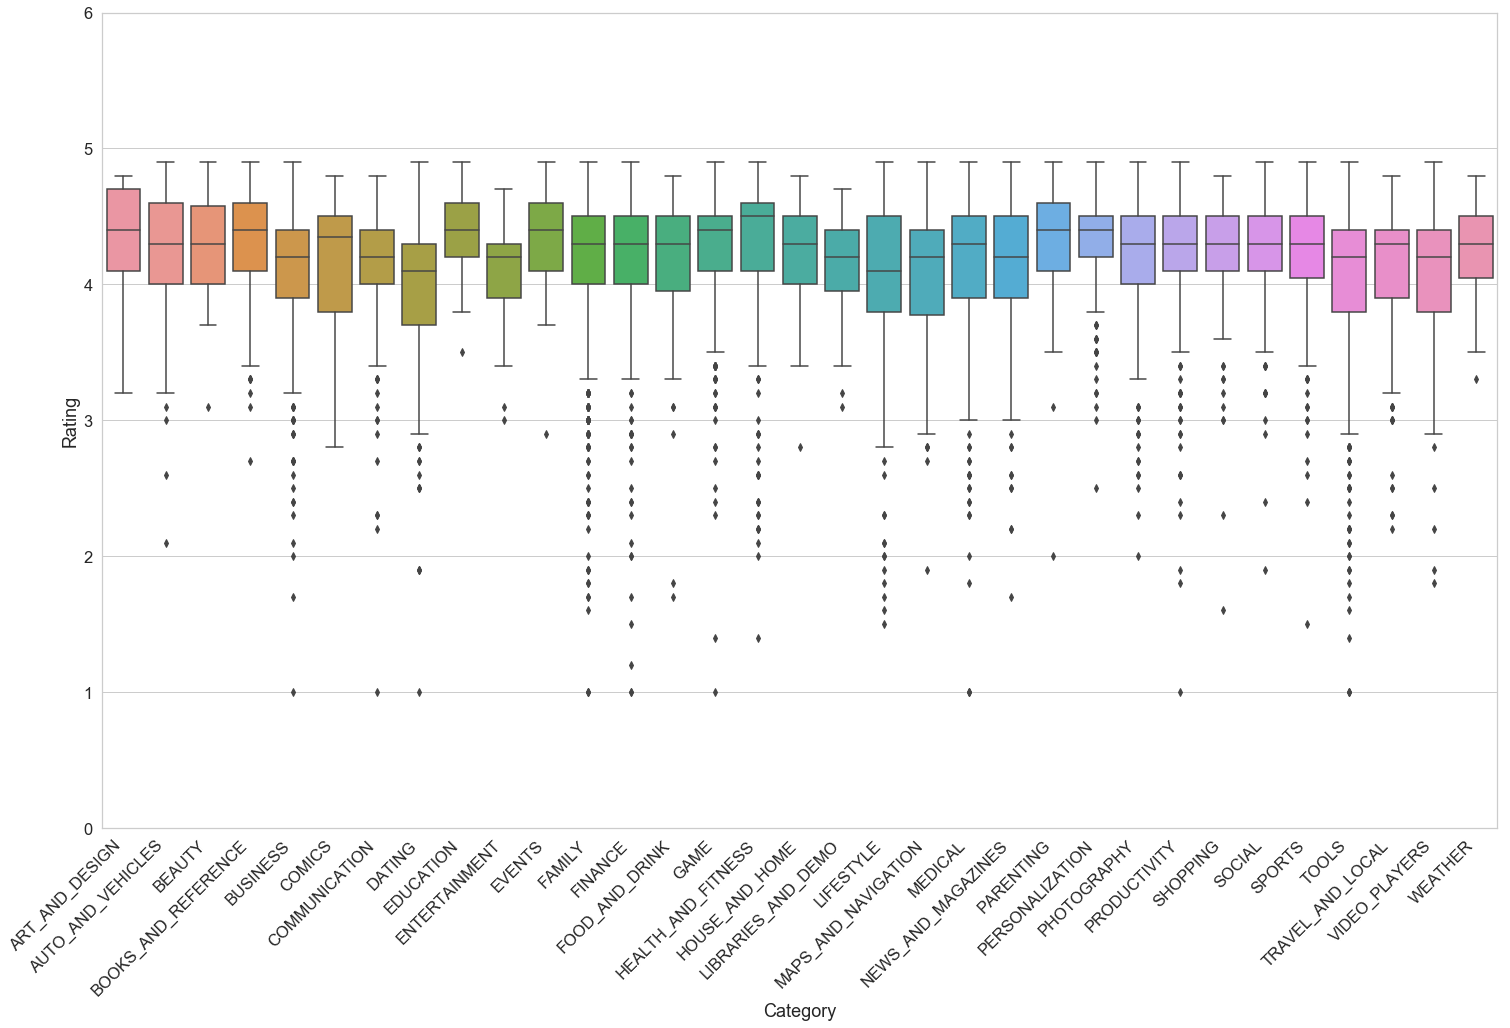

In [11]:
#boxplot of category, which shows the relationship between rating and category
sns.set(rc={'figure.figsize':(25,15)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=play)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')
plt.ylim(0,6)

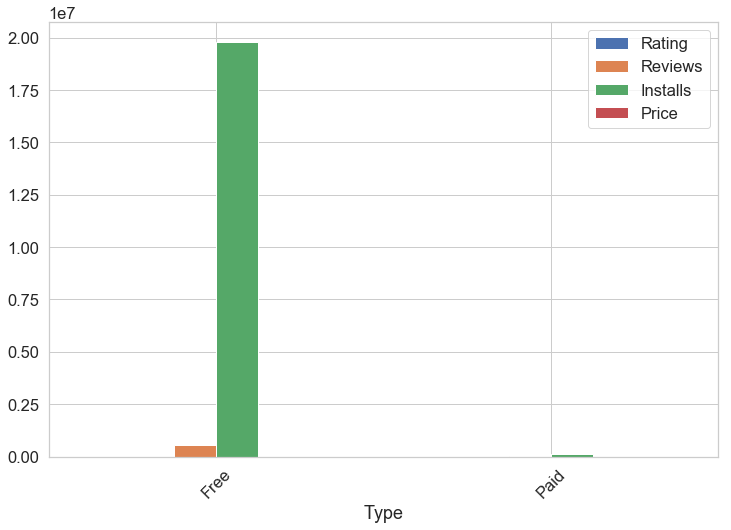

In [12]:
play.groupby('Type').mean().plot(kind='bar',figsize=(12,8),rot=45)

Text(0.5, 1.0, ' Rating based on review')

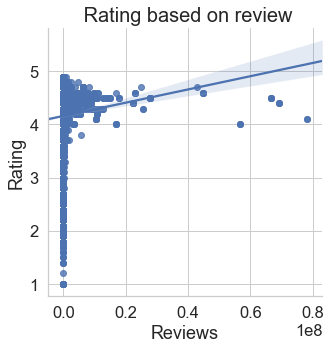

In [13]:
#relationship between Reviews and rating
sns.lmplot(x='Reviews',y='Rating',data=play,fit_reg=True)
plt.title(' Rating based on review',size = 20)

In [14]:
# fit the ols regression between reviews and rating 
model=sm.ols(formula="Rating~Reviews",data=play).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     56.92
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           4.98e-14
Time:                        10:54:33   Log-Likelihood:                -6627.3
No. Observations:                9092   AIC:                         1.326e+04
Df Residuals:                    9090   BIC:                         1.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1608      0.005    780.243      0.0

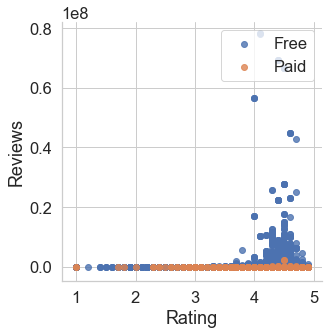

In [15]:
#Relationship of Review and rating by type
#Q: how to make the y limit smaller,like divided by 1000
sns.lmplot( x="Rating", y="Reviews", data=play, fit_reg=False, hue='Type', legend=False)
plt.legend(loc='upper right')

In [ ]:
#Relationship between Rating and install by type
#Q: how to lower the y limit.
sns.lmplot( x="Rating", y="Installs", data=play, fit_reg=False, hue='Type', legend=False)
plt.legend(loc='upper right')